# Part 3 Basic Stat Overview and Regression Analysis

## 3.1 Stat Overview and basic Visuals

### 3.1.1 Read the data and load the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import math
import pandas as pd
import plotly.express as px
import re

In [2]:
# cdc_20_21_stat = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

cdc_c = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined/combined_cdc_r_v_u_df.csv', encoding = "UTF-8")

In [3]:
# drop the location column, for corr analysis:
#cdc_regression = cdc_20_21_stat.drop(columns=['Location'])
cdc_regression = cdc_c.drop(columns=['Location','GeoLocation', 'GEOID', 'Rural_Pop_Percent', 'Urban_Housing_Percent', 'Rural_Housing_Percent'])


In [14]:
describe_df = cdc_regression.describe()

In [4]:
cdc_regression.dtypes

All teeth lost among adults aged >=65 years                                                                                                                                                       float64
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                      float64
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years                                                                                                              float64
Mammography use among women aged 50-74 years                                                                                                                                                      float64
Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening                                

In [7]:
describe_df.to_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/description_cols2.csv', index = False)

In [5]:
cdc_regression.var(axis = 0)

All teeth lost among adults aged >=65 years                                                                                                                                                         15.190014
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                         5.695312
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years                                                                                                                21.837299
Mammography use among women aged 50-74 years                                                                                                                                                        15.754218
Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening                

In [4]:
cdc_regression.columns = cdc_regression.columns.str.replace(' ', '_')
cdc_regression.columns = cdc_regression.columns.str.replace('(', '_')
cdc_regression.columns = cdc_regression.columns.str.replace(')', '_')
cdc_regression.columns = cdc_regression.columns.str.replace(',', '_')
cdc_regression.columns = cdc_regression.columns.str.replace('>=', 'GE')
cdc_regression.columns = cdc_regression.columns.str.replace('-', 'to')

In [5]:
cdc_regression.columns

Index(['All_teeth_lost_among_adults_aged_GE65_years',
       'Cervical_cancer_screening_among_adult_women_aged_21to65_years',
       'Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening',
       'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years',
       'Sleeping_less_than_7_hours_among_adults_aged_GE18_years',
       'Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years',
       'Any_disability_among_adults_aged_GE18_years',
       'Arthritis_among_adults_aged_GE18_years',
       'Binge_drinking_among_adults_aged_GE18_years',
       'Cancer__excluding_skin_cancer__among_adults_a

Text(0.5, 1.0, 'Correlation Matrix')

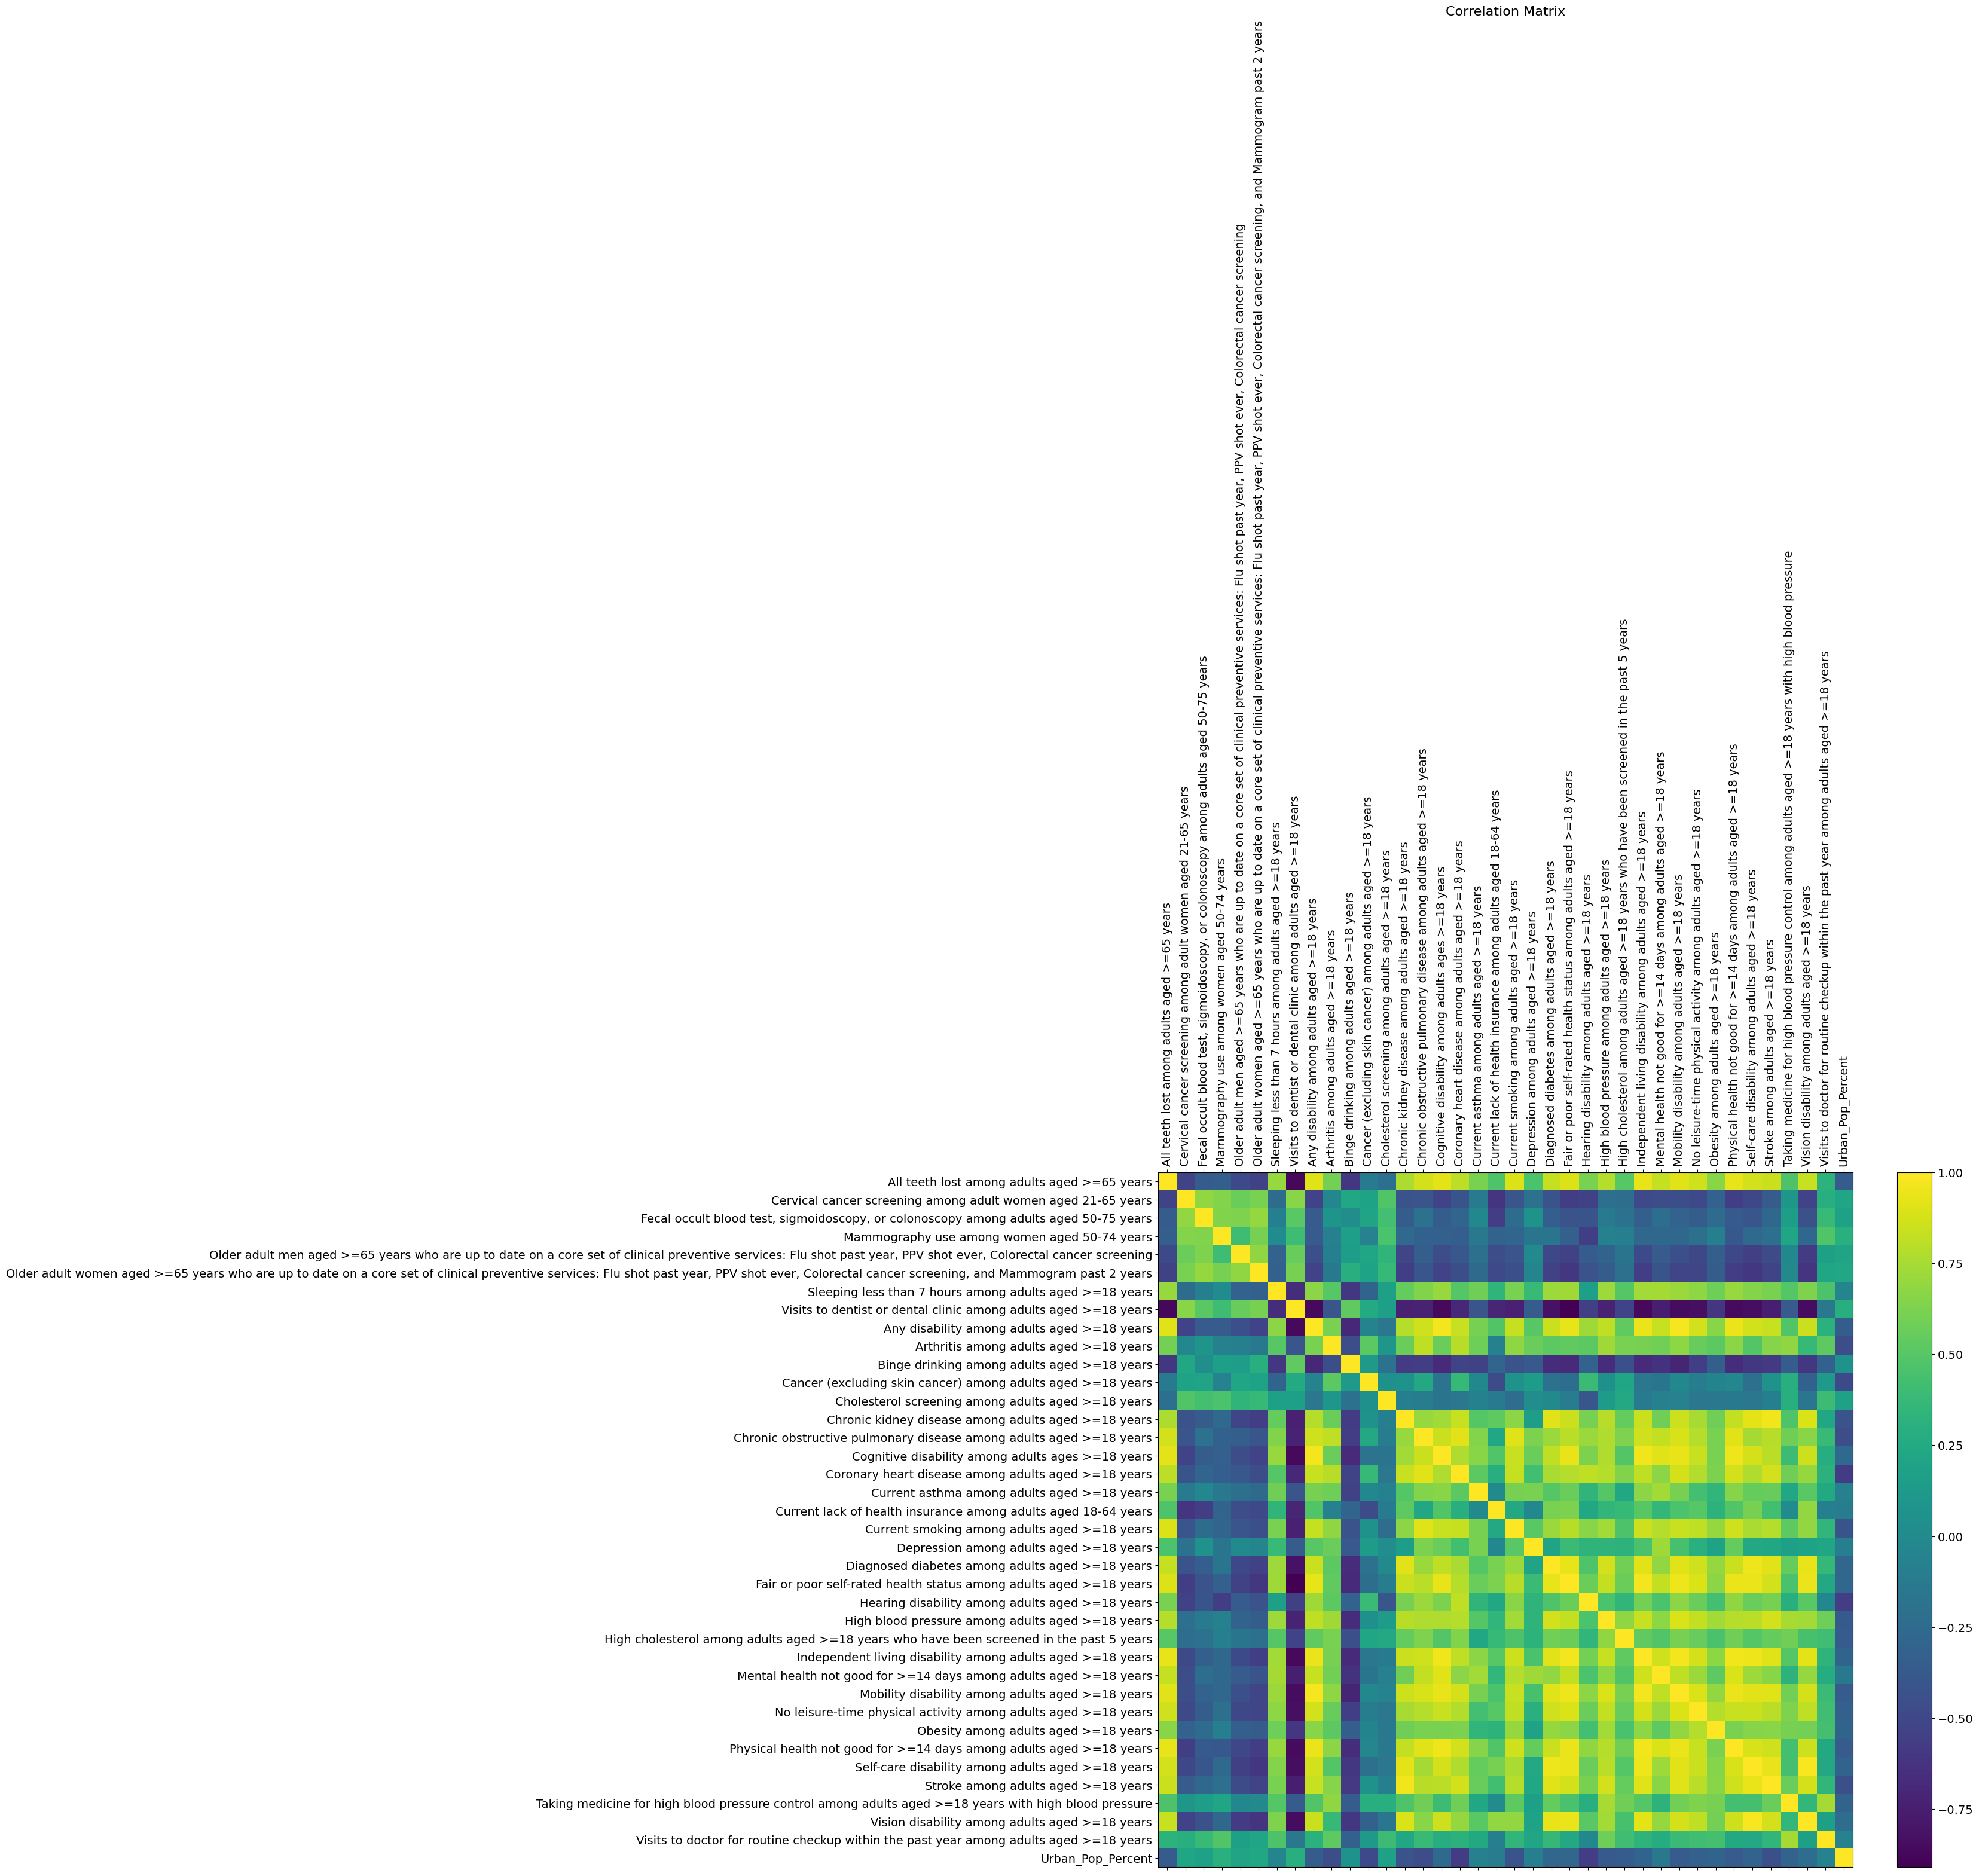

In [11]:
# create the figure set dimensions
f = plt.figure(figsize=(19, 15)) 

# matshow - creates matrix plot for df_office.corr(), fignum - assigned number for when there is multiple figures plotted
plt.matshow(cdc_regression.corr(), fignum=f.number) 

# if you are using pandas 2.1, use the following code to replace the above line
# plt.matshow(df_office.corr(numeric_only=True), fignum=f.number)
plt.xticks(range(cdc_regression.select_dtypes(['number']).shape[1]), cdc_regression.select_dtypes(['number']).columns, fontsize=14, rotation=90) # add the x axis label
plt.yticks(range(cdc_regression.select_dtypes(['number']).shape[1]), cdc_regression.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title

For multi-linear regressions: manually select columns based on correlation:

In [13]:
cdc_rg_dp = cdc_regression.drop(columns=['Selftocare_disability_among_adults_aged_GE18_years','Independent_living_disability_among_adults_aged_GE18_years','Vision_disability_among_adults_aged_GE18_years', 'Any_disability_among_adults_aged_GE18_years', 'All_teeth_lost_among_adults_aged_GE65_years','Fair_or_poor_selftorated_health_status_among_adults_aged_GE18_years', 'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening', 'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years','Cancer__excluding_skin_cancer__among_adults_aged_GE18_years','Cognitive_disability_among_adults_ages_GE18_years', 'Coronary_heart_disease_among_adults_aged_GE18_years'])

In [20]:
cdc_rg_dp.columns

Index(['Cervical_cancer_screening_among_adult_women_aged_21to65_years',
       'Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Sleeping_less_than_7_hours_among_adults_aged_GE18_years',
       'Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years',
       'Arthritis_among_adults_aged_GE18_years',
       'Binge_drinking_among_adults_aged_GE18_years',
       'Cholesterol_screening_among_adults_aged_GE18_years',
       'Chronic_kidney_disease_among_adults_aged_GE18_years',
       'Chronic_obstructive_pulmonary_disease_among_adults_aged_GE18_years',
       'Current_asthma_among_adults_aged_GE18_years',
       'Current_lack_of_health_insurance_among_adults_aged_18to64_years',
       'Current_smoking_among_adults_aged_GE18_years',
       'Depression_among_adults_aged_GE18_years',
       'Diagnosed_diabetes_among_adults_aged_GE18_years',
       'Hearing_disability_among_adults_ag

In [15]:
cdc_rg_chd = cdc_regression.drop(columns=['Selftocare_disability_among_adults_aged_GE18_years','Independent_living_disability_among_adults_aged_GE18_years','Vision_disability_among_adults_aged_GE18_years','Any_disability_among_adults_aged_GE18_years','All_teeth_lost_among_adults_aged_GE65_years','Fair_or_poor_selftorated_health_status_among_adults_aged_GE18_years', 'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening', 'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years','Cancer__excluding_skin_cancer__among_adults_aged_GE18_years','Cognitive_disability_among_adults_ages_GE18_years','Depression_among_adults_aged_GE18_years'])

In [17]:
cdc_rg_chd.shape

(3076, 27)

In [18]:
cdc_rf_can = cdc_regression.drop(columns=['Selftocare_disability_among_adults_aged_GE18_years','Independent_living_disability_among_adults_aged_GE18_years','Vision_disability_among_adults_aged_GE18_years','Any_disability_among_adults_aged_GE18_years','All_teeth_lost_among_adults_aged_GE65_years','Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening', 'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years','Coronary_heart_disease_among_adults_aged_GE18_years','Fair_or_poor_selftorated_health_status_among_adults_aged_GE18_years','Cognitive_disability_among_adults_ages_GE18_years','Depression_among_adults_aged_GE18_years'])

In [19]:
cdc_rf_can.shape

(3076, 27)

plus 2 and log the urban population percentage column.

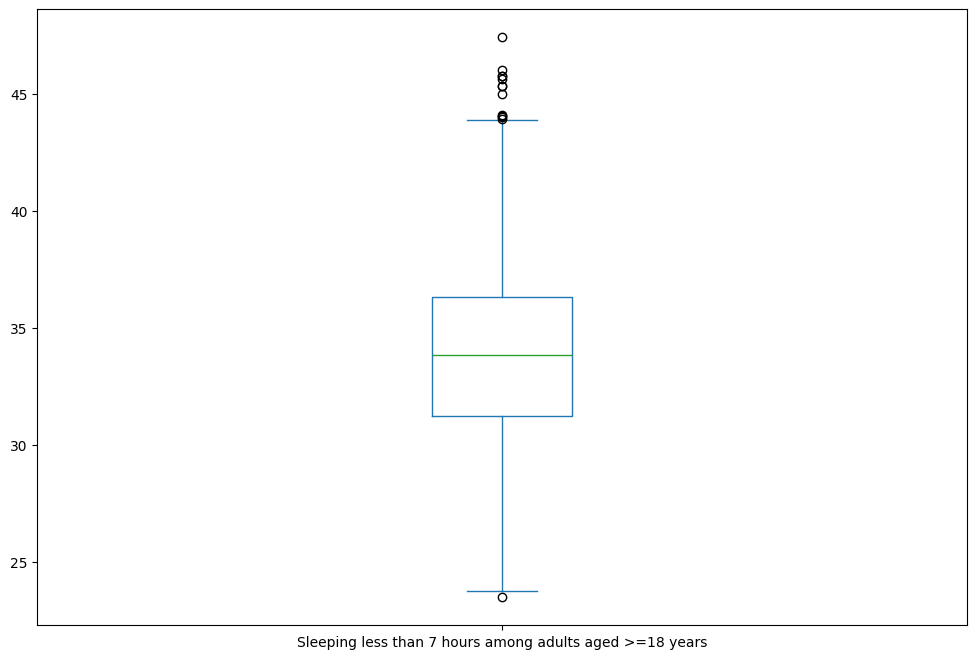

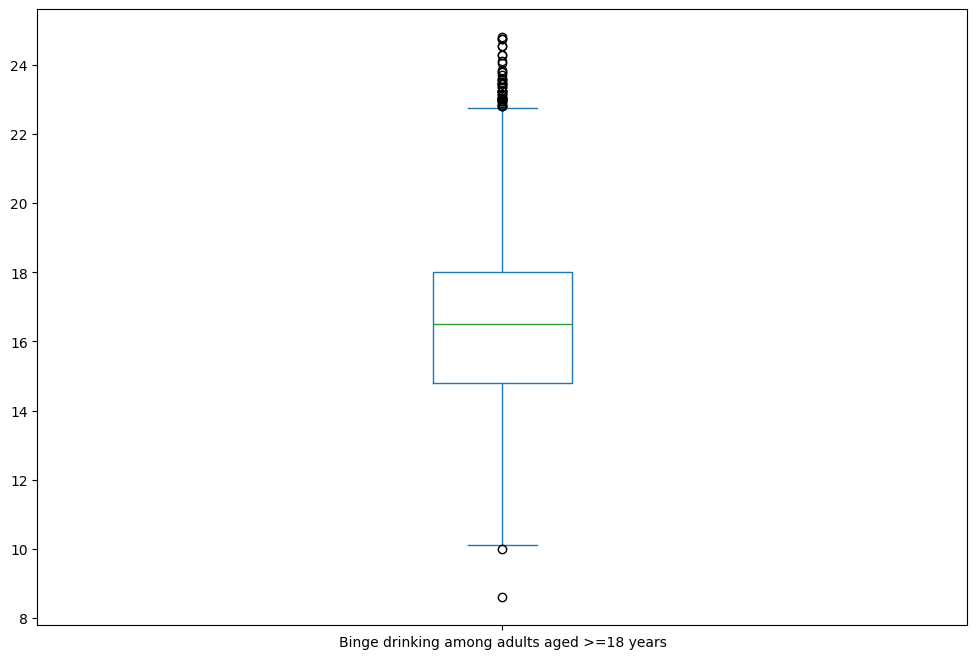

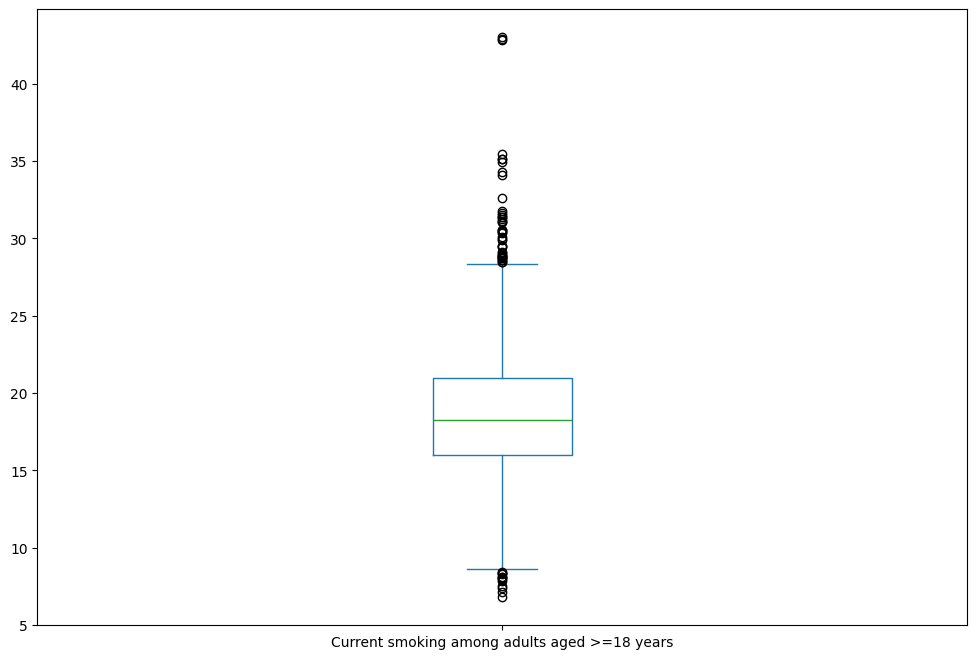

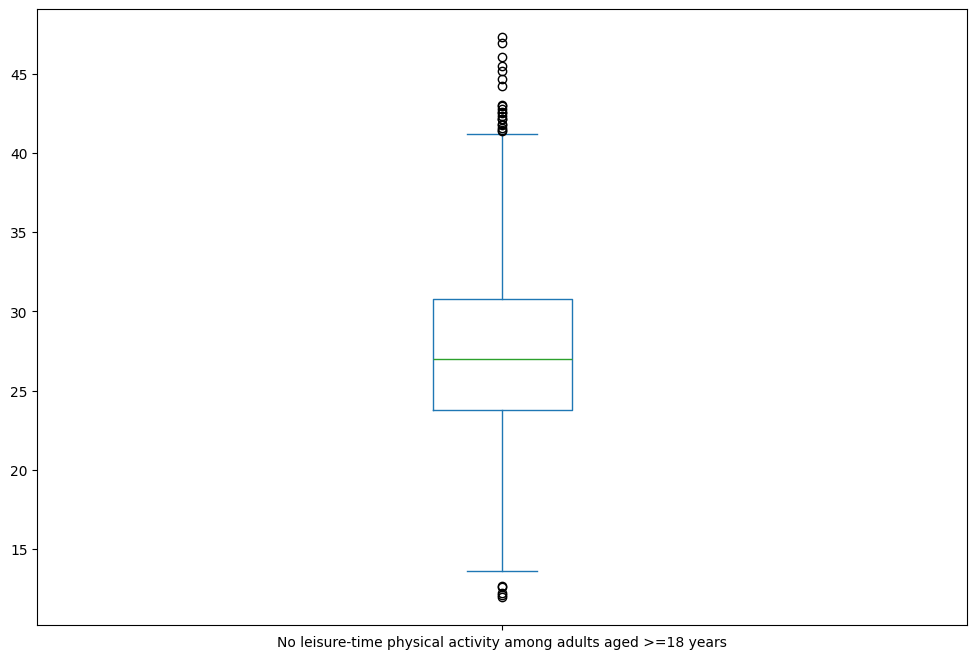

## 3.2 Regression Analysis

### 3.2.1 Simple linear regression
To better perform the regression, replace all the spaces in the colnames

#### 3.2.1.1 Selecting the dependent variables:

To measure a population health outcomes, there are three key columns of interest here:

`Coronary Heart Disease Prevalence (age >= 18)`:
'Coronary_heart_disease_among_adults_aged_GE18_years'

`Cancer Prevalence (age >= 18)`:
'Cancer__excluding_skin_cancer__among_adults_aged_GE18_years'

`Depression Prevalence (age >=18)`:
'Depression_among_adults_aged_GE18_years',

In [14]:
depended_vars = ['Coronary_heart_disease_among_adults_aged_GE18_years', 'Cancer__excluding_skin_cancer__among_adults_aged_GE18_years', 'Depression_among_adults_aged_GE18_years']

The : in some column names are not handled, these columns are dropped since they reflect different ages and indicates very little correlation with our target columns.

In [8]:
cdc_regression.columns

Index(['All_teeth_lost_among_adults_aged_GE65_years',
       'Cervical_cancer_screening_among_adult_women_aged_21to65_years',
       'Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening',
       'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years',
       'Sleeping_less_than_7_hours_among_adults_aged_GE18_years',
       'Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years',
       'Any_disability_among_adults_aged_GE18_years',
       'Arthritis_among_adults_aged_GE18_years',
       'Binge_drinking_among_adults_aged_GE18_years',
       'Cancer__excluding_skin_cancer__among_adults_a

In [19]:
import statsmodels.formula.api as smf

reg_chd = smf.ols(formula='Coronary_heart_disease_among_adults_aged_GE18_years ~ Urban_Pop_Percent',data= cdc_regression).fit()

In [20]:
print(reg_chd.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.332
Model:                                                             OLS   Adj. R-squared:                  0.332
Method:                                                  Least Squares   F-statistic:                     1528.
Date:                                                 Sun, 21 Jan 2024   Prob (F-statistic):          1.18e-271
Time:                                                         13:06:08   Log-Likelihood:                -4014.6
No. Observations:                                                 3076   AIC:                             8033.
Df Residuals:                                                     3074   BIC:                             8045.
Df Model:                                                            1                                  

In [21]:
beta_0, beta_1 = reg_chd.params
rsq    = reg_chd.rsquared
pval_0, pval_1 = reg_chd.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of binge drinking = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = -0.019 x + 7.412
R^2 =  0.3320075728640577
p-value of binge drinking =  0.0
p-value of intercept =  0.0


- The model's **R-squared value is 0.267**, which means approximately 26.7% of the variance in the dependent variable can be explained by the model's independent variable.
- The coefficient fo**r `Binge Drinking Prevalence` is -0.2308** , suggesting that for each unit increase in drinking prevalence the Coronary Heart Disease Prevalence is expected t odecrease 0.2308.
- The p-values for both the intercept and the `Binge Drinking Prevalence` coefficient **are very small** (close to 0), indicating that these results are statistically significant.
- Additional model statistics, such as **the Durbin-Watson value of 1.347**, suggest the possibility of positive autocorrelation. 
- **The Jarque-Bera (JB)** test result is significantly high, with a p-value close to 0, indicating that the residuals do not follow a normal distribution. This could impact the validity of certain inferential statistics, such as confidence intervals and hypothesis tets.

y = -0.019 x + 7.412
Rsq =  0.3320075728640577
p-value of intercept =  0.0
p-value of Urban Population Percentance =  1.1777433917200925e-271


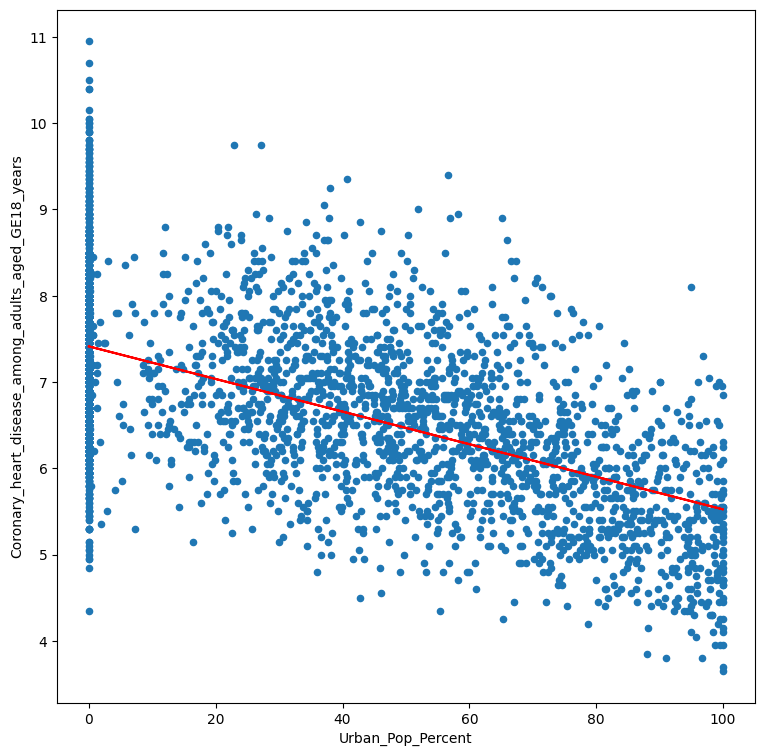

In [26]:
# plot the result
fig, ax = plt.subplots()
cdc_regression.plot(kind='scatter', x='Urban_Pop_Percent', y='Coronary_heart_disease_among_adults_aged_GE18_years', figsize=(9, 9), ax = ax)

X = cdc_regression.Urban_Pop_Percent
b = plt.plot(X, X*beta_1 + beta_0, 'r') # regression line

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of intercept = ", round(pval_0,5))
print("p-value of Urban Population Percentance = ", pval_1)

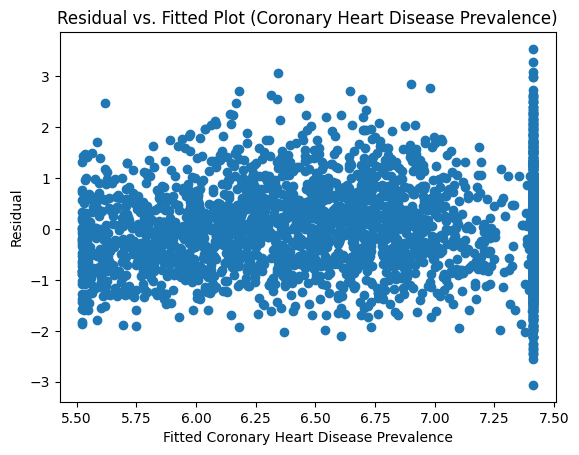

In [23]:
# plot 
plt.scatter(reg_chd.fittedvalues, reg_chd.resid)
# adding title and labels
plt.xlabel('Fitted Coronary Heart Disease Prevalence')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (Coronary Heart Disease Prevalence)')
plt.show()

In [15]:
cdc_regression.columns

Index(['All_teeth_lost_among_adults_aged_GE65_years',
       'Cervical_cancer_screening_among_adult_women_aged_21to65_years',
       'Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening',
       'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years',
       'Sleeping_less_than_7_hours_among_adults_aged_GE18_years',
       'Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years',
       'Any_disability_among_adults_aged_GE18_years',
       'Arthritis_among_adults_aged_GE18_years',
       'Binge_drinking_among_adults_aged_GE18_years',
       'Cancer__excluding_skin_cancer__among_adults_a

Cancer:

In [24]:
reg_cancer = smf.ols(formula='Cancer__excluding_skin_cancer__among_adults_aged_GE18_years ~ Urban_Pop_Percent',data= cdc_regression).fit()

In [30]:
beta_0, beta_1 = reg_cancer.params
rsq    = reg_cancer.rsquared
pval_0, pval_1 = reg_cancer.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of binge drinking = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = -0.01 x + 7.386
R^2 =  0.23033258267975953
p-value of binge drinking =  0.0
p-value of intercept =  0.0


In [32]:
print(reg_chd.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.332
Model:                                                             OLS   Adj. R-squared:                  0.332
Method:                                                  Least Squares   F-statistic:                     1528.
Date:                                                 Sun, 21 Jan 2024   Prob (F-statistic):          1.18e-271
Time:                                                         13:11:03   Log-Likelihood:                -4014.6
No. Observations:                                                 3076   AIC:                             8033.
Df Residuals:                                                     3074   BIC:                             8045.
Df Model:                                                            1                                  

y = -0.01 x + 7.386
Rsq =  0.23033258267975953
p-value of Urban Population Percentage =  5.299953001394012e-177


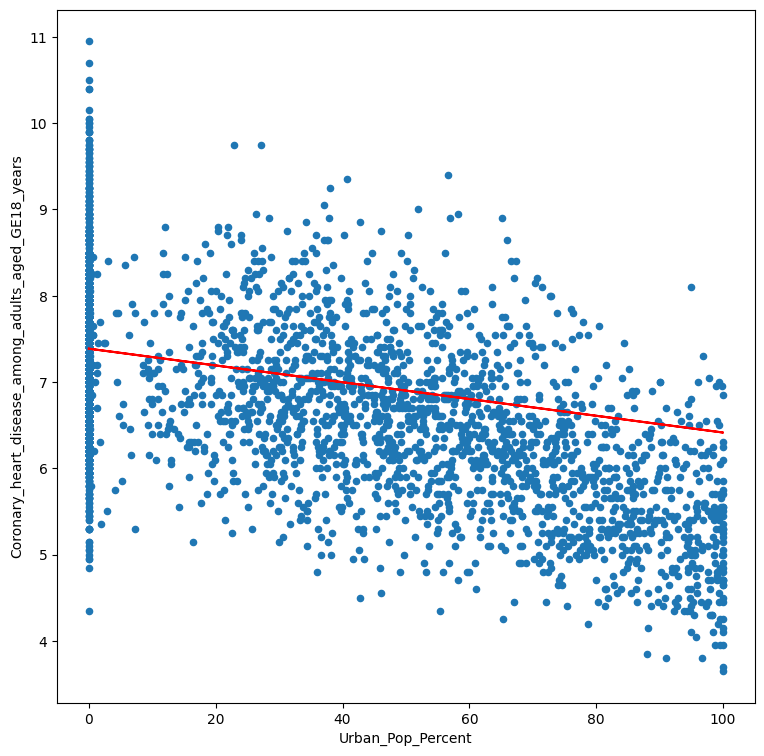

In [31]:
# plot the result
fig, ax = plt.subplots()
cdc_regression.plot(kind='scatter', x='Urban_Pop_Percent', y='Coronary_heart_disease_among_adults_aged_GE18_years', figsize=(9, 9), ax = ax)

X = cdc_regression.Urban_Pop_Percent
b = plt.plot(X, X*beta_1 + beta_0, 'r') # regression line

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of Urban Population Percentage = ", pval_1)

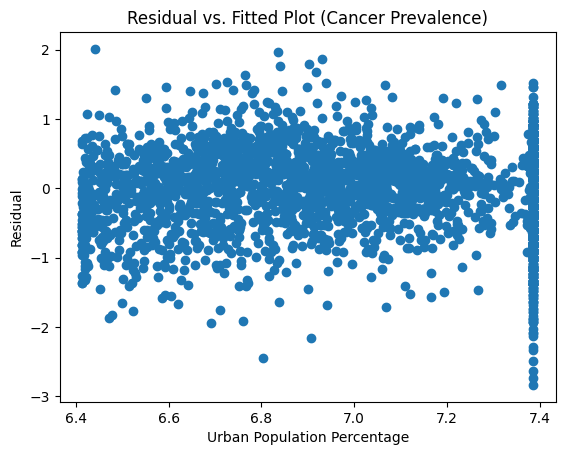

In [29]:
# plot 
plt.scatter(reg_cancer .fittedvalues, reg_cancer.resid)
# adding title and labels
plt.xlabel('Urban Population Percentage')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (Cancer Prevalence)')
plt.show()

Depression

In [33]:
reg_depress = smf.ols(formula='Depression_among_adults_aged_GE18_years ~ Urban_Pop_Percent',data= cdc_regression).fit()

In [34]:
print(reg_depress.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Depression_among_adults_aged_GE18_years   R-squared:                       0.008
Model:                                                 OLS   Adj. R-squared:                  0.008
Method:                                      Least Squares   F-statistic:                     24.64
Date:                                     Sun, 21 Jan 2024   Prob (F-statistic):           7.27e-07
Time:                                             13:11:52   Log-Likelihood:                -7938.9
No. Observations:                                     3076   AIC:                         1.588e+04
Df Residuals:                                         3074   BIC:                         1.589e+04
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [35]:
beta_0, beta_1 = reg_depress.params
rsq    = reg_depress.rsquared
pval_0, pval_1 = reg_depress.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of binge drinking = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = -0.009 x + 22.868
R^2 =  0.007953468874833725
p-value of binge drinking =  0.0
p-value of intercept =  0.0


y = -0.009 x + 22.868
Rsq =  0.007953468874833725
p-value of Urban Population Percentage =  7.268044527096183e-07


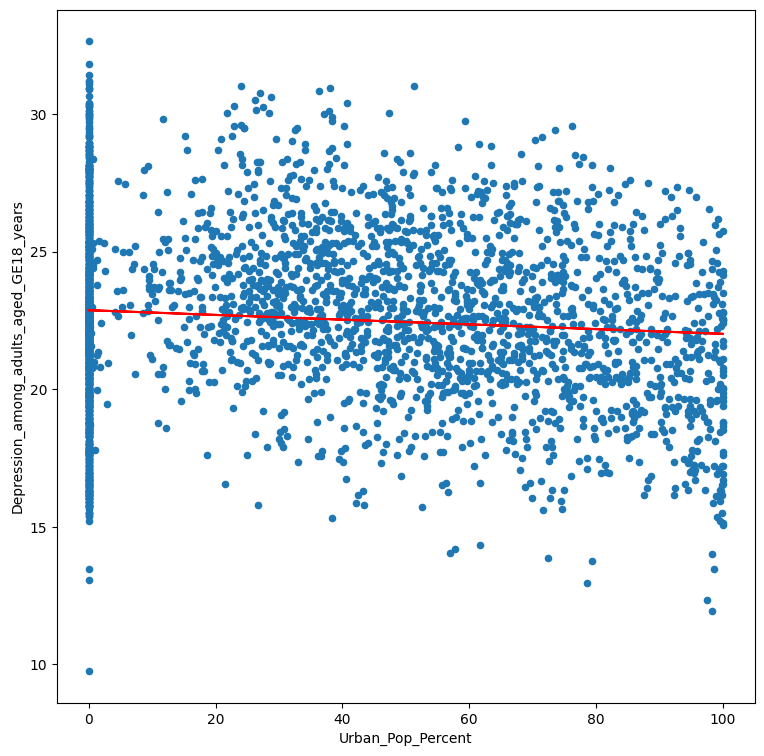

In [36]:
# plot the result
fig, ax = plt.subplots()
cdc_regression.plot(kind='scatter', x='Urban_Pop_Percent', y='Depression_among_adults_aged_GE18_years', figsize=(9, 9), ax = ax)

X = cdc_regression.Urban_Pop_Percent
b = plt.plot(X, X*beta_1 + beta_0, 'r') # regression line

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of Urban Population Percentage = ", pval_1)

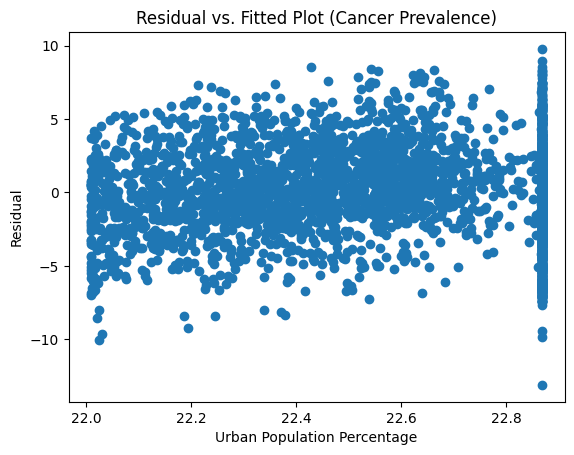

In [37]:
# plot 
plt.scatter(reg_depress.fittedvalues, reg_depress.resid)
# adding title and labels
plt.xlabel('Urban Population Percentage')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (Cancer Prevalence)')
plt.show()

Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. 


Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between depth and tempearture (and thus $\beta_0$ equals zero)
- **alternative hypothesis:** There is a relationship between depth and tempearture (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [38]:
reg_chd.pvalues

Intercept             0.000000e+00
Urban_Pop_Percent    1.177743e-271
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for depth is far less than 0.05, and so we **believe** that there is a relationship between depth and tempearture.

Note that we generally ignore the p-value for the intercept.

                                             OLS Regression Results                                            
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.697
Model:                                                             OLS   Adj. R-squared:                  0.697
Method:                                                  Least Squares   F-statistic:                     7064.
Date:                                                 Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                                                         13:20:05   Log-Likelihood:                -2799.9
No. Observations:                                                 3076   AIC:                             5604.
Df Residuals:                                                     3074   BIC:                             5616.
Df Model:                                                            1                                  

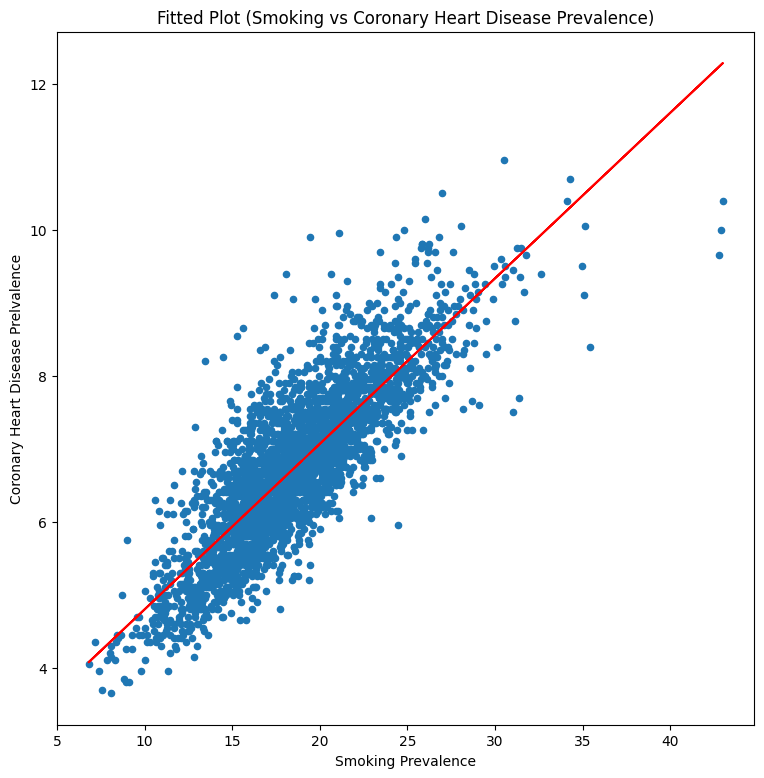

In [39]:
# Similarly

reg_chd_smoking = smf.ols(formula='Coronary_heart_disease_among_adults_aged_GE18_years ~ Current_smoking_among_adults_aged_GE18_years',data=cdc_regression).fit()

# And this gives a big summary of the results:
print(reg_chd_smoking.summary())


beta_0, beta_1 = reg_chd_smoking.params
rsq    = reg_chd_smoking.rsquared
pval_0, pval_1 = reg_chd_smoking.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of binge drinking = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))



# plot the result
fig, ax = plt.subplots()
cdc_regression.plot(kind='scatter', x='Current_smoking_among_adults_aged_GE18_years', y='Coronary_heart_disease_among_adults_aged_GE18_years', figsize=(9, 9), ax = ax)

X = cdc_regression.Current_smoking_among_adults_aged_GE18_years
b = plt.plot(X, X*beta_1 + beta_0, 'r') # regression line
plt.xlabel('Smoking Prevalence')
plt.ylabel('Coronary Heart Disease Prelvalence')
plt.title('Fitted Plot (Smoking vs Coronary Heart Disease Prevalence)')

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of Smoking Prevalence = ", pval_1)


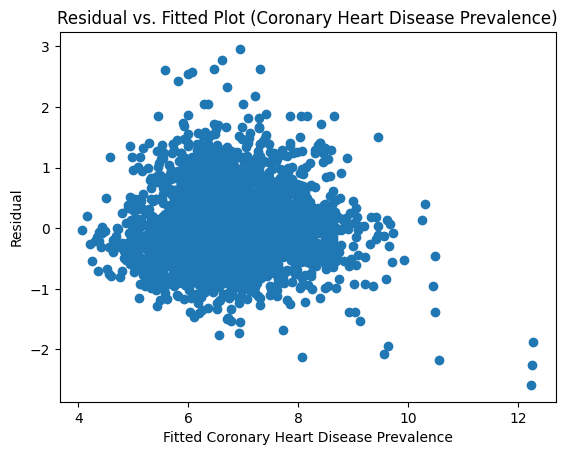

In [40]:
# plot 
plt.scatter(reg_chd_smoking.fittedvalues, reg_chd_smoking.resid)
# adding title and labels
plt.xlabel('Fitted Coronary Heart Disease Prevalence')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (Coronary Heart Disease Prevalence)')
plt.show()

The R square is much better! This indicates a better prediction of population's chd by smoking rather than drinking. 

### 3.2.2 Multi-linear regression
#### 3.2.2.1 Multi-linear for CHD

In [41]:
# create a fitted model with all three features
reg_chd_multi = smf.ols(formula='Coronary_heart_disease_among_adults_aged_GE18_years ~ Sleeping_less_than_7_hours_among_adults_aged_GE18_years + Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years + Cervical_cancer_screening_among_adult_women_aged_21to65_years + Binge_drinking_among_adults_aged_GE18_years + Current_smoking_among_adults_aged_GE18_years + Visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults_aged_GE18_years + No_leisuretotime_physical_activity_among_adults_aged_GE18_years + Cholesterol_screening_among_adults_aged_GE18_years + Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_blood_pressure + Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years + Urban_Pop_Percent',data=cdc_regression).fit()

# print the coefficients
reg_chd_multi.params

Intercept                                                                                                5.960636
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                                 -0.040022
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                   -0.023024
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                           -0.036496
Binge_drinking_among_adults_aged_GE18_years                                                             -0.114191
Current_smoking_among_adults_aged_GE18_years                                                             0.150052
Visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults_aged_GE18_years                  -0.013747
No_leisuretotime_physical_activity_among_adults_aged_GE18_years                                          0.000410
Cholesterol_screening_among_adults_aged_GE18_years                                      

In [42]:
reg_chd_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.848
Model:                                                             OLS   Adj. R-squared:                  0.847
Method:                                                  Least Squares   F-statistic:                     1555.
Date:                                                 Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                                                         13:21:57   Log-Likelihood:                -1737.3
No. Observations:                                                 3076   AIC:                             3499.
Df Residuals:                                                     3064   BIC:                             3571.
Df Model:                                                           11                                         
Covariance Type:                                             nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                 5.9606      0.387     15.404      0.000       5.202       6.719
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                                  -0.0400      0.004    -10.949      0.000      -0.047      -0.033
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                    -0.0230      0.003     -8.972      0.000      -0.028      -0.018
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                            -0.0365      0.006     -6.228      0.000      -0.048      -0.025
Binge_drinking_among_adults_aged_GE18_years                                                              -0.1142      0.004    -26.169      0.000      -0.123      -0.106
Current_smoking_among_adults_aged_GE18_years                                                              0.1501      0.004     38.800      0.000       0.142       0.158
Visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults_aged_GE18_years                   -0.0137      0.003     -4.358      0.000      -0.020      -0.008
No_leisuretotime_physical_activity_among_adults_aged_GE18_years                                           0.0004      0.004      0.096      0.924      -0.008       0.009
Cholesterol_screening_among_adults_aged_GE18_years                                                        0.0045      0.003      1.288      0.198      -0.002       0.011
Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_blood_pressure     0.0931      0.005     18.912      0.000       0.083       0.103
Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years                                           0.0032      0.003      1.239      0.216      -0.002       0.008
Urban_Pop_Percent                                                                                        -0.0076      0.000    -27.193      0.000      -0.008      -0.007
==============================================================================
Omnibus:                      235.262   Durbin-Watson:                   1.184
Prob(Omnibus

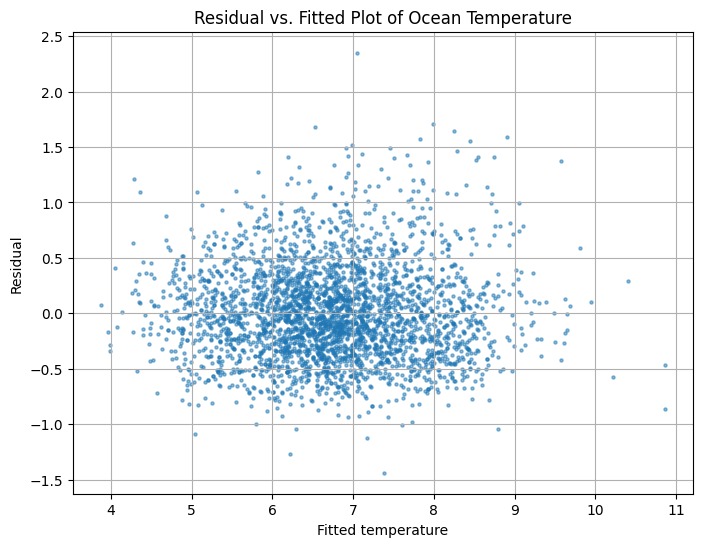

In [43]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  

plt.scatter(reg_chd_multi.fittedvalues, reg_chd_multi.resid, alpha = 0.5, s=5)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted temperature')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Ocean Temperature')
# Adding grid lines
plt.grid(True)
plt.show()

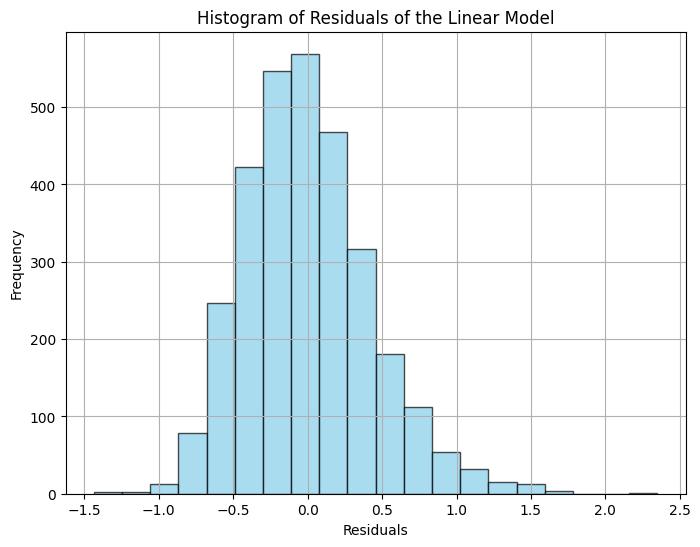

In [32]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(reg_chd_multi.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

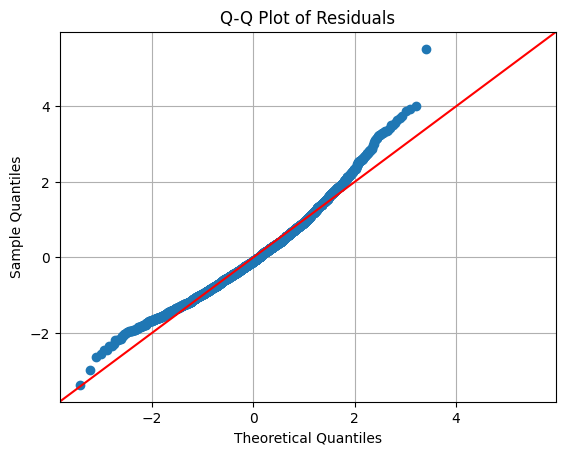

In [44]:
import statsmodels.api as sm

# Q-Q plot
fig = sm.qqplot(reg_chd_multi.resid, fit=True, line="45")
plt.title('Q-Q Plot of Residuals')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

__VIF__

In [7]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
         # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df



In [46]:
#cdc_regression_drop = cdc_regression.drop(drop_col_list_chd, axis=1)
# check columns
# cdc_regression_drop.columns
#cdc_regression_processed_new = drop_column_using_vif_(cdc_regression_drop.drop('Coronary_heart_disease_among_adults_aged_GE18_years', axis=1))

cdc_regression_processed_new = drop_column_using_vif_(cdc_regression.drop('Coronary_heart_disease_among_adults_aged_GE18_years', axis=1))

Dropping: Selftocare_disability_among_adults_aged_GE18_years
Dropping: Independent_living_disability_among_adults_aged_GE18_years
Dropping: Mobility_disability_among_adults_aged_GE18_years
Dropping: Physical_health_not_good_for_GE14_days_among_adults_aged_GE18_years
Dropping: Vision_disability_among_adults_aged_GE18_years
Dropping: Any_disability_among_adults_aged_GE18_years
Dropping: Stroke_among_adults_aged_GE18_years
Dropping: Fair_or_poor_selftorated_health_status_among_adults_aged_GE18_years
Dropping: Diagnosed_diabetes_among_adults_aged_GE18_years
Dropping: Cognitive_disability_among_adults_ages_GE18_years
Dropping: Chronic_obstructive_pulmonary_disease_among_adults_aged_GE18_years
Dropping: All_teeth_lost_among_adults_aged_GE65_years
Dropping: High_blood_pressure_among_adults_aged_GE18_years
Dropping: Mental_health_not_good_for_GE14_days_among_adults_aged_GE18_years
Dropping: No_leisuretotime_physical_activity_among_adults_aged_GE18_years
Dropping: Arthritis_among_adults_aged_GE

In [39]:
cdc_regression_processed_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                                          --------------  -----  
 0   Cervical_cancer_screening_among_adult_women_aged_21to65_years                                                                                                                                   3076 non-null   float64
 1   Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                                                                                                           3076 non-null   float64
 2   Mamm

In [40]:
cdc_regression_processed_new.columns

Index(['Cervical_cancer_screening_among_adult_women_aged_21to65_years',
       'Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening',
       'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years',
       'Sleeping_less_than_7_hours_among_adults_aged_GE18_years',
       'Binge_drinking_among_adults_aged_GE18_years',
       'Cancer__excluding_skin_cancer__among_adults_aged_GE18_years',
       'Cholesterol_screening_among_adults_aged_GE18_years',
       'Current_asthma_among_adults_aged_GE18_years',
       'Current_lack_of_health_insurance_among_adults_aged_18to64_years',
       'Depression_among_

In [41]:
import statsmodels.api as sm

# create the new fitted model with all three features
reg_cdc_regression_processed_new = sm.OLS(endog=cdc_regression[['Coronary_heart_disease_among_adults_aged_GE18_years']], exog=sm.add_constant(cdc_regression_processed_new)).fit()

# print the new coefficients
reg_cdc_regression_processed_new.params

const                                                                                                                                                                                            -6.412451
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                                                                                                                     0.000549
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                                                                                                             0.011708
Mammography_use_among_women_aged_50to74_years                                                                                                                                                     0.019431
Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening                            

In [42]:
# print a summary of the fitted model
reg_cdc_regression_processed_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.927
Model:                                                             OLS   Adj. R-squared:                  0.927
Method:                                                  Least Squares   F-statistic:                     2156.
Date:                                                 Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                                                         23:27:49   Log-Likelihood:                -610.20
No. Observations:                                                 3076   AIC:                             1258.
Df Residuals:                                                     3057   BIC:                             1373.
Df Model:                                                           18                                         
Covariance Type:                                             nonrobust                                         
==================================================================================================================================================================================================================================================================
                                                                                                                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                                                                             -6.4125      0.357    -17.971      0.000      -7.112      -5.713
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                                                                                                                      0.0005      0.004      0.122      0.903      -0.008       0.009
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                                                                                                              0.0117      0.002      5.193      0.000       0.007       0.016
Mammography_use_among_women_aged_50to74_years                                                                                                                                                      0.0194      0.002      7.809      0.000       0.015       0.024
Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening                                  -0.0152      0.002     -9.532      0.000      -0.018      -0.012
Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years    -0.0323      0.002    -15.137      0.000      -0.037      -0.028
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                                                                                                                            0.0244      0.003      8.242      0.000       0.019       0.030
Binge_drinking_among_adults_aged_GE18_years                                                                                       

In [43]:
cdh_LM_sum = reg_cdc_regression_processed_new.summary()
#cdh_LM_sum_df = cdh_LM_sum.as_dataframe()
cdh_LM_sum_df_01 = pd.DataFrame(cdh_LM_sum.tables[0])
cdh_LM_sum_df_02 = pd.DataFrame(cdh_LM_sum.tables[1])
cdh_LM_sum_df_03 = pd.DataFrame(cdh_LM_sum.tables[2])
#cdh_LM_sum_df_01
#cdh_LM_sum.tables[2]

In [44]:
cdh_LM_sum_df_01.to_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/multi_lin_chd_01v2.csv', index = True)
cdh_LM_sum_df_02.to_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/multi_lin_chd_02v2.csv', index = True)
cdh_LM_sum_df_03.to_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/multi_lin_chd_03v2.csv', index = True)

__Residual Analysis__

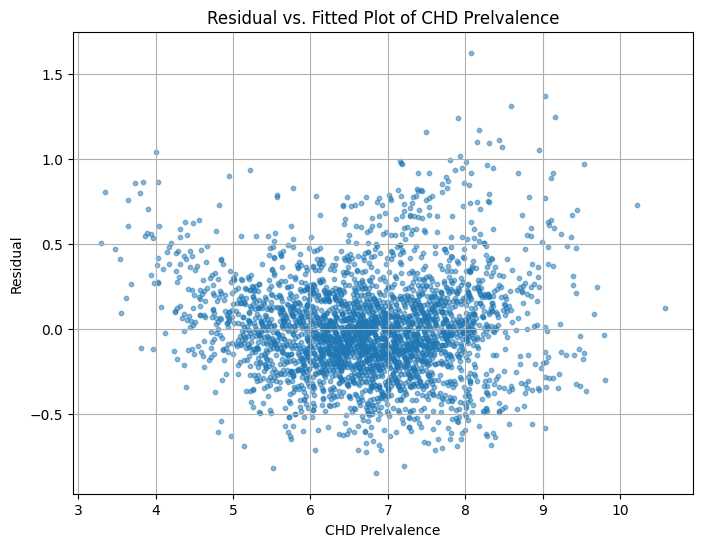

In [47]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(reg_cdc_regression_processed_new.fittedvalues, reg_cdc_regression_processed_new.resid, alpha = 0.5, s=10)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('CHD Prelvalence')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of CHD Prelvalence')
# Adding grid lines
plt.grid(True)
plt.show()

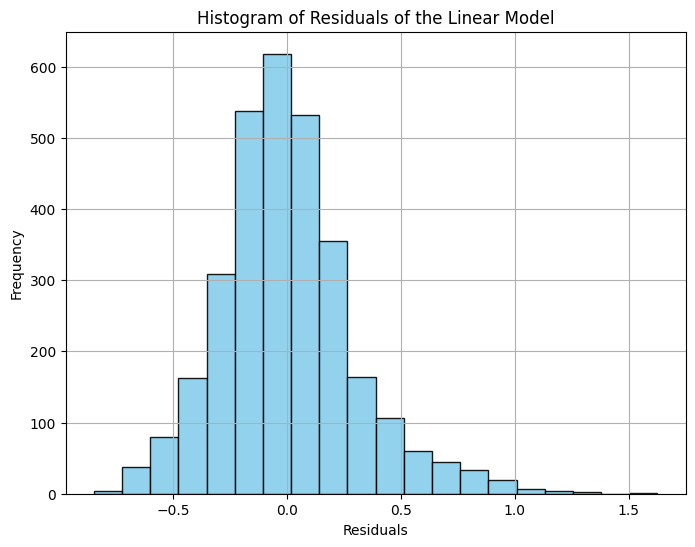

In [48]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(reg_cdc_regression_processed_new.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.9)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

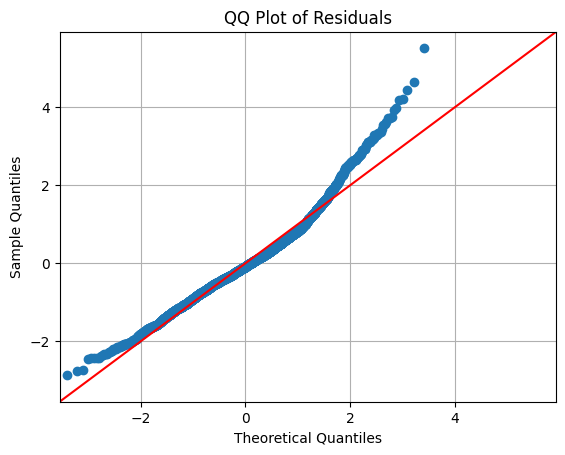

In [49]:
# Q-Q plot
fig = sm.qqplot(reg_cdc_regression_processed_new.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [50]:
list_coef = reg_cdc_regression_processed_new.params

In [51]:
list_coef

const                                                                                                                                                                                            -6.412451
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                                                                                                                     0.000549
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                                                                                                             0.011708
Mammography_use_among_women_aged_50to74_years                                                                                                                                                     0.019431
Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening                            

In [52]:
coef = []
for element in list_coef:
    coef.append(element)

In [53]:
coef.pop(0)

-6.412451062952226

In [57]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = reg_cdc_regression_processed_new.resid
# Run the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, reg_cdc_regression_processed_new.model.exog)

labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange Multiplier Statistic': 337.3394181455803, 'p-value': 9.537236974253637e-61, 'f-value': 20.91952475892339, 'f p-value': 1.2830562345793198e-64}


In [56]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(residuals, reg_cdc_regression_processed_new.model.exog)
print('F-statistic:', gq_test[0], 'p-value:', gq_test[1])

F-statistic: 0.9447336124869117 p-value: 0.8659899376314417


After BP test we have discover significant heteroscedasticity

In [120]:
#log transform the chd prevalence:
cdc_regression_drop['log_chd'] = np.log(cdc_regression_drop['Coronary_heart_disease_among_adults_aged_GE18_years'])

In [121]:
# create the new fitted model with all three features
reg_cdc_regression_log = sm.OLS(endog=cdc_regression_drop [['log_chd']], exog=sm.add_constant(cdc_regression_processed_new)).fit()

# print the new coefficients
reg_cdc_regression_log.params

const                                                                                                    1.385624
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                           -0.003049
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                   -0.001748
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                                 -0.010301
Binge_drinking_among_adults_aged_GE18_years                                                             -0.013449
Cholesterol_screening_among_adults_aged_GE18_years                                                      -0.003790
Current_smoking_among_adults_aged_GE18_years                                                             0.024946
High_cholesterol_among_adults_aged_GE18_years_who_have_been_screened_in_the_past_5_years                 0.016358
Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_b

In [122]:
reg_cdc_regression_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_chd   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1685.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:23:47   Log-Likelihood:                 3926.0
No. Observations:                3076   AIC:                            -7832.
Df Residuals:                    3066   BIC:                            -7772.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                     1.3856      0.059     23.680      0.000       1.271       1.500
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                            -0.0030      0.001     -3.604      0.000      -0.005      -0.001
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                    -0.0017      0.000     -4.476      0.000      -0.003      -0.001
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                                  -0.0103      0.001    -19.610      0.000      -0.011      -0.009
Binge_drinking_among_adults_aged_GE18_years                                                              -0.0134      0.001    -20.508      0.000      -0.015      -0.012
Cholesterol_screening_among_adults_aged_GE18_years                                                       -0.0038      0.001     -6.956      0.000      -0.005      -0.003
Current_smoking_among_adults_aged_GE18_years                                                              0.0249      0.001     48.745      0.000       0.024       0.026
High_cholesterol_among_adults_aged_GE18_years_who_have_been_screened_in_the_past_5_years                  0.0164      0.001     23.242      0.000       0.015       0.018
Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_blood_pressure     0.0148      0.001     21.315      0.000       0.013       0.016
Visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults_aged_GE18_years                   -0.0041      0.000     -8.387      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       33.803   Durbin-Watson:                   1.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.153
Skew:                           0.116   Prob(JB):                     2.12e-11
Kurtosis:                       3.574   Cond. No.                     8.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Perform stat test for log transformed data:

In [123]:
residuals = reg_cdc_regression_log.resid
# Run the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, reg_cdc_regression_log.model.exog)

labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange Multiplier Statistic': 225.3630658240475, 'p-value': 1.5575816116862177e-43, 'f-value': 26.932115943503064, 'f p-value': 2.941908598467353e-45}


In [124]:
gq_test = het_goldfeldquandt(residuals, reg_cdc_regression_log.model.exog)
print('F-statistic:', gq_test[0], 'p-value:', gq_test[1])

F-statistic: 1.4562233861034592 p-value: 1.2105724023204717e-13


Still high perform sqrt transform

In [125]:
#Applying square root transformation
cdc_regression_drop['sqrt_chd'] = np.sqrt(cdc_regression_drop['Coronary_heart_disease_among_adults_aged_GE18_years'])

In [126]:
# create the new fitted model with all three features
reg_cdc_regression_sqrt = sm.OLS(endog=cdc_regression_drop [['sqrt_chd']], exog=sm.add_constant(cdc_regression_processed_new)).fit()

# print the new coefficients
# reg_cdc_regression_sqrt.params
reg_cdc_regression_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sqrt_chd   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1778.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:23:47   Log-Likelihood:                 3232.7
No. Observations:                3076   AIC:                            -6445.
Df Residuals:                    3066   BIC:                            -6385.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                     1.9618      0.073     26.761      0.000       1.818       2.106
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                            -0.0038      0.001     -3.558      0.000      -0.006      -0.002
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                    -0.0022      0.000     -4.425      0.000      -0.003      -0.001
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                                  -0.0133      0.001    -20.255      0.000      -0.015      -0.012
Binge_drinking_among_adults_aged_GE18_years                                                              -0.0183      0.001    -22.314      0.000      -0.020      -0.017
Cholesterol_screening_among_adults_aged_GE18_years                                                       -0.0044      0.001     -6.441      0.000      -0.006      -0.003
Current_smoking_among_adults_aged_GE18_years                                                              0.0325      0.001     50.709      0.000       0.031       0.034
High_cholesterol_among_adults_aged_GE18_years_who_have_been_screened_in_the_past_5_years                  0.0211      0.001     23.923      0.000       0.019       0.023
Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_blood_pressure     0.0179      0.001     20.628      0.000       0.016       0.020
Visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults_aged_GE18_years                   -0.0053      0.001     -8.611      0.000      -0.006      -0.004
==============================================================================
Omnibus:                       69.761   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.943
Skew:                           0.329   Prob(JB):                     7.21e-18
Kurtosis:                       3.428   Cond. No.                     8.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
residuals = reg_cdc_regression_sqrt.resid
# Run the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, reg_cdc_regression_sqrt.model.exog)

labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange Multiplier Statistic': 148.56534231902015, 'p-value': 1.748130051203733e-27, 'f-value': 17.288604484209223, 'f p-value': 3.4777535997618533e-28}


In [128]:
gq_test = het_goldfeldquandt(residuals, reg_cdc_regression_sqrt.model.exog)
print('F-statistic:', gq_test[0], 'p-value:', gq_test[1])

F-statistic: 1.473236787822236 p-value: 2.207349321216085e-14


After Sqrt transform, still high heteroscedasticity, try inverse transform

In [129]:
# Applying inverse transformation
cdc_regression_drop['inverse_transformed_chd'] = 1 / cdc_regression_drop['Coronary_heart_disease_among_adults_aged_GE18_years']

In [130]:
# create the new fitted model with all three features
reg_cdc_regression_it = sm.OLS(endog=cdc_regression_drop [['inverse_transformed_chd']], exog=sm.add_constant(cdc_regression_processed_new)).fit()

# print the new summary
reg_cdc_regression_it.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     inverse_transformed_chd   R-squared:                       0.801
Model:                                 OLS   Adj. R-squared:                  0.800
Method:                      Least Squares   F-statistic:                     1371.
Date:                     Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                             01:23:47   Log-Likelihood:                 9358.5
No. Observations:                     3076   AIC:                        -1.870e+04
Df Residuals:                         3066   BIC:                        -1.864e+04
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
=========================================================================================================================================================================
                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                     0.2383      0.010     23.816      0.000       0.219       0.258
Cervical_cancer_screening_among_adult_women_aged_21to65_years                                             0.0005      0.000      3.442      0.001       0.000       0.001
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years                     0.0003   6.68e-05      4.413      0.000       0.000       0.000
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                                   0.0016   8.98e-05     17.344      0.000       0.001       0.002
Binge_drinking_among_adults_aged_GE18_years                                                               0.0018      0.000     16.048      0.000       0.002       0.002
Cholesterol_screening_among_adults_aged_GE18_years                                                        0.0007   9.32e-05      7.584      0.000       0.001       0.001
Current_smoking_among_adults_aged_GE18_years                                                             -0.0038   8.75e-05    -42.895      0.000      -0.004      -0.004
High_cholesterol_among_adults_aged_GE18_years_who_have_been_screened_in_the_past_5_years                 -0.0025      0.000    -20.724      0.000      -0.003      -0.002
Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_blood_pressure    -0.0025      0.000    -21.434      0.000      -0.003      -0.002
Visits_to_doctor_for_routine_checkup_within_the_past_year_among_adults_aged_GE18_years                    0.0006   8.35e-05      7.529      0.000       0.000       0.001
==============================================================================
Omnibus:                      266.073   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.302
Skew:                           0.488   Prob(JB):                    5.18e-153
Kurtosis:                       5.126   Cond. No.                     8.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
residuals = reg_cdc_regression_it.resid
# Run the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, reg_cdc_regression_it.model.exog)

labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange Multiplier Statistic': 345.79593596080866, 'p-value': 4.862014897531073e-69, 'f-value': 43.14737876273186, 'f p-value': 2.3757972188233637e-73}


In [132]:
gq_test = het_goldfeldquandt(residuals, reg_cdc_regression_it.model.exog)
print('F-statistic:', gq_test[0], 'p-value:', gq_test[1])

F-statistic: 1.39110271897657 p-value: 6.130151886010733e-11


#### 3.2.2.2 Multi-linear for Cancer Prevalence

# Appendix Code blocks or plots not used

## 3.3 XGBoost and Random Forest Regression are done in other sections in separa notebooks now, all CODE BLOCKS BELOW are superseded.

This will use XGBoost to repeat the above regression for CHD.

### 3.3.1 Import XGBoost libs

In [133]:
cdc_regression_drop = cdc_regression.drop(['Coronary_heart_disease_among_adults_aged_GE18_years'], axis=1)

In [ ]:
cdc_regression.columns = cdc_regression.columns.str.replace(' ', '_')
cdc_regression.columns = cdc_regression.columns.str.replace('(', '_')
cdc_regression.columns = cdc_regression.columns.str.replace(')', '_')
cdc_regression.columns = cdc_regression.columns.str.replace(',', '_')
cdc_regression.columns = cdc_regression.columns.str.replace('>=', 'GE')
cdc_regression.columns = cdc_regression.columns.str.replace('-', 'to')

In [134]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cdc_regression_drop, cdc_regression['Coronary_heart_disease_among_adults_aged_GE18_years'], test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Root Mean Squared Error: 0.16295952800378286
Mean Absolute Error: 0.12584616108374158
Mean Squared Error: 0.026555807767215688
R2 score: 0.9767662650047471


In [135]:
# print all other metrics
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Root Mean Squared Error: 0.16295952800378286
Mean Absolute Error: 0.12584616108374158
Mean Squared Error: 0.026555807767215688
R2 score: 0.9767662650047471


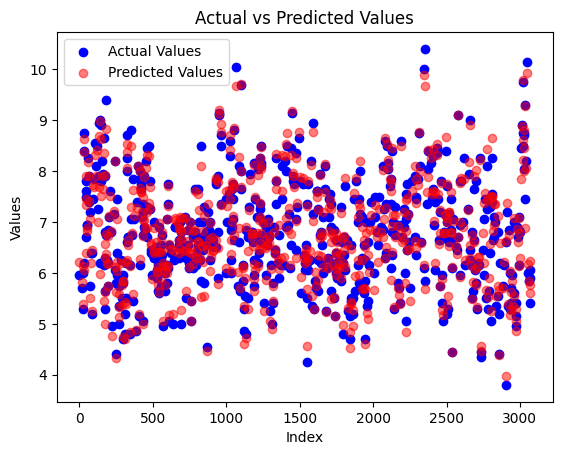

In [136]:
# Scatter plot for actual values
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test.index, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

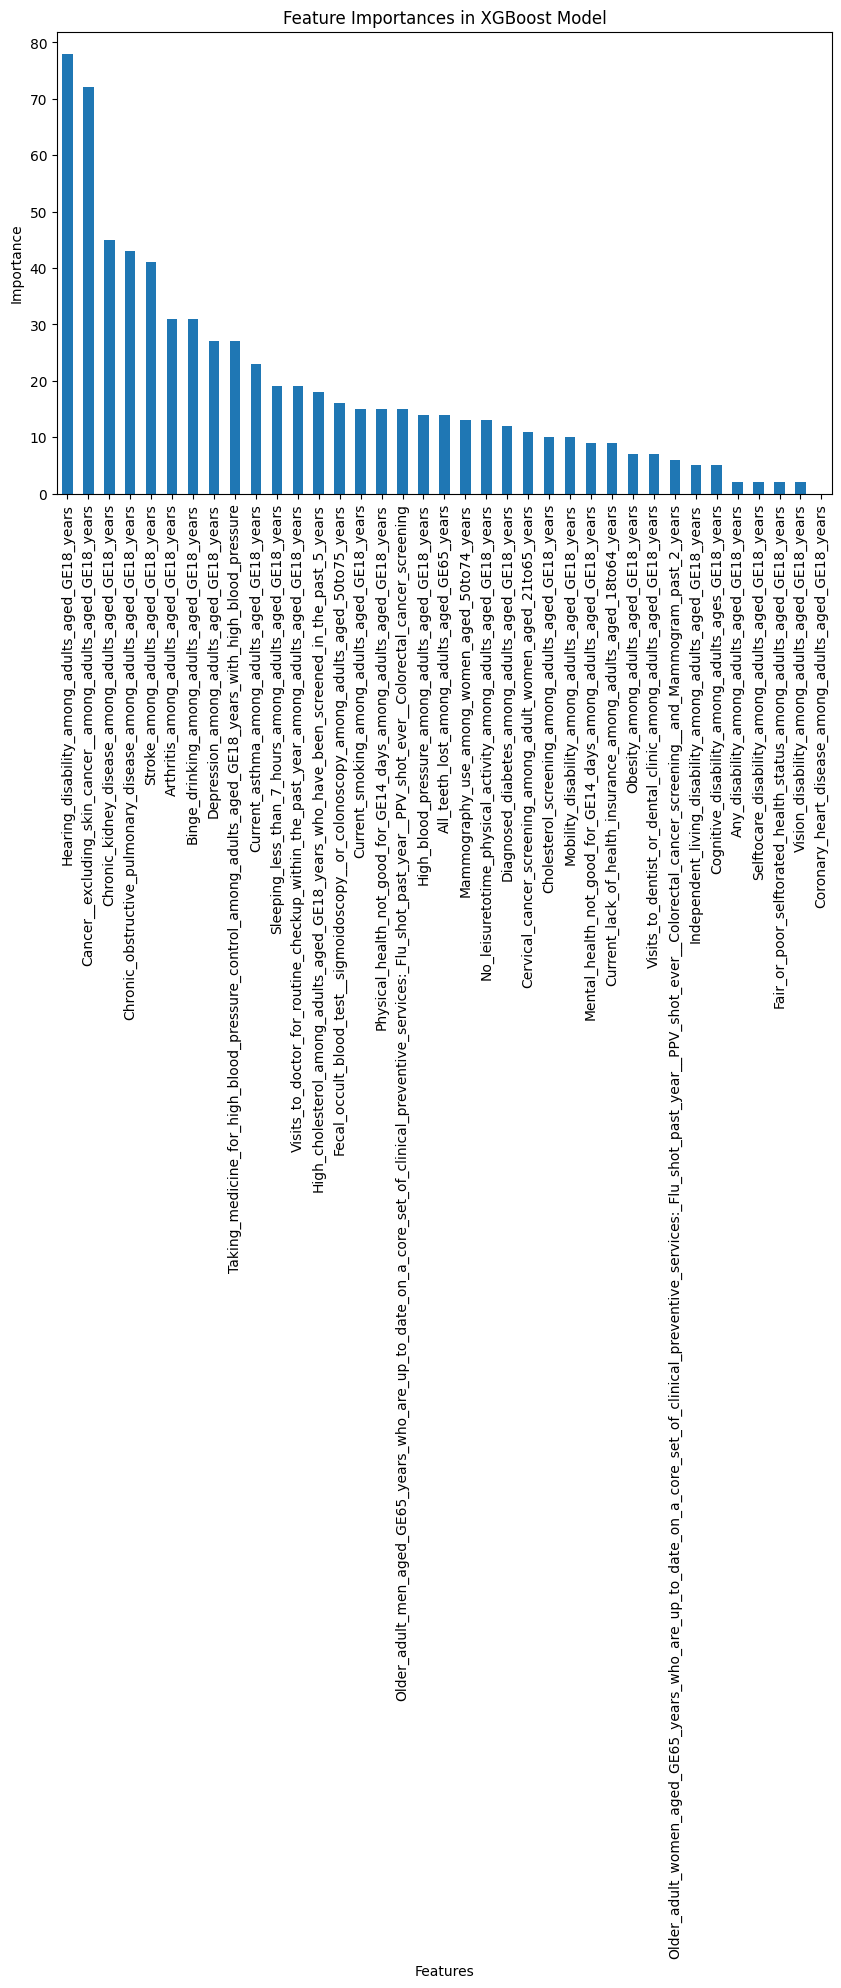

In [137]:
importance_dict = xgb_model.get_score(importance_type='weight')
importances = [importance_dict.get(f, 0.) for f in cdc_regression.columns]

# Create a series for visualization
importance_series = pd.Series(importances, index=cdc_regression.columns)

# Sort the feature importances
sorted_importances = importance_series.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in XGBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## 3.4 Random Forest Regressor
The relationship, demonstrate very high non-linearity, thus, try random forest regression here.

In [138]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cdc_regression_drop, cdc_regression['Coronary_heart_disease_among_adults_aged_GE18_years'], test_size=0.2, random_state=42)

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.02796465097402602


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.1247694805194805


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9755336649647173


<Axes: >

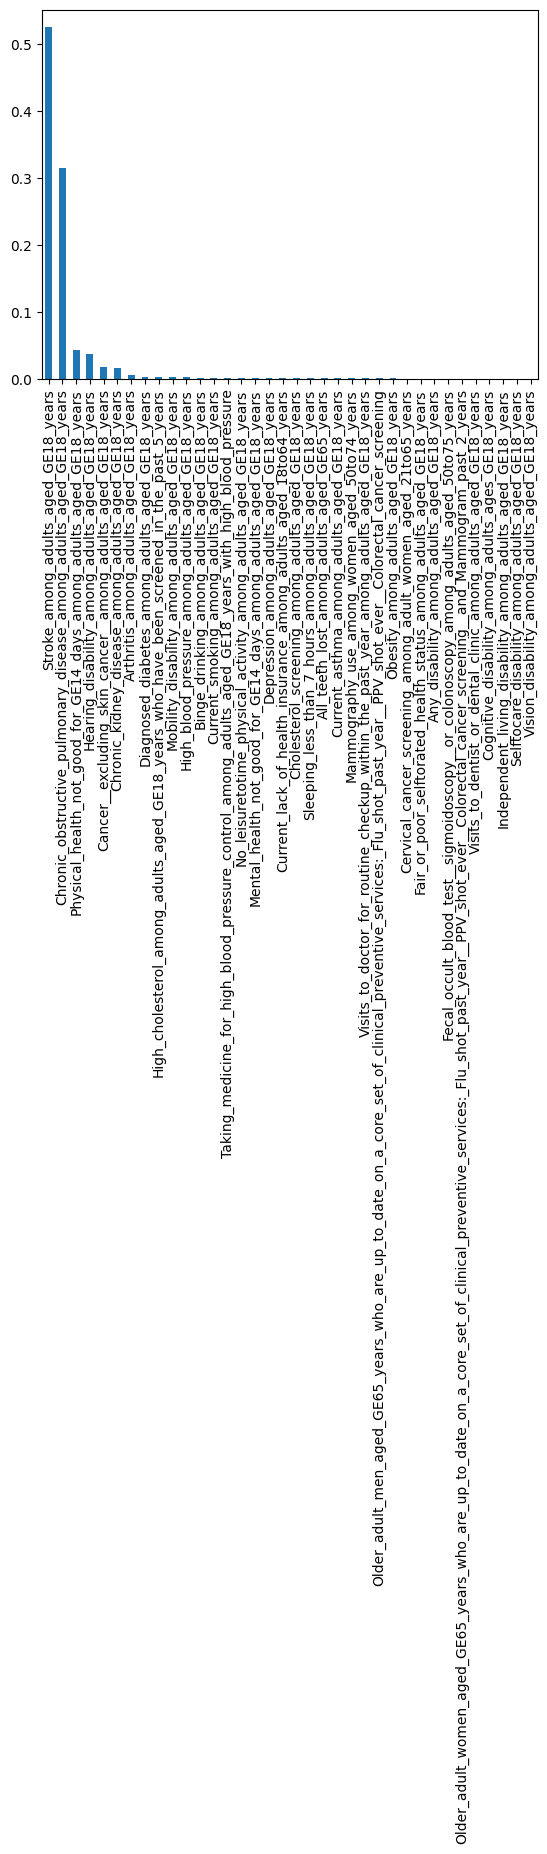

In [ ]:
feature_importances = rf_regressor.feature_importances_
# Create a Series for easier plotting
importances = pd.Series(feature_importances, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar')


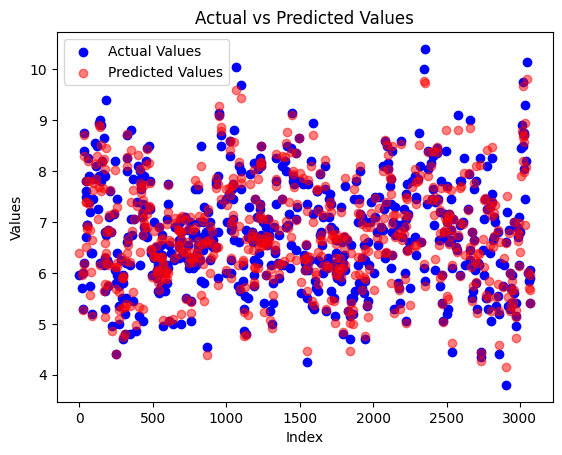

In [ ]:
# Scatter plot for actual values
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test.index, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

__Adding Cross Validation__

In [ ]:

y = y_train + y_test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

X = cdc_regression_drop
y = cdc_regression['Coronary_heart_disease_among_adults_aged_GE18_years']

# Perform cross-validation
scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
rf_regressor.fit(X, y)
# Convert scores to positive values (because 'neg_mean_squared_error' returns negative values)
mse_scores = -scores

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

# Get R-squared scores
rs_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='r2')
print("R-squared scores for each fold:", rs_scores)
print("Mean R-squared:", rs_scores.mean())


# Perform cross-validation

#scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')


# Convert scores to positive values (because 'neg_mean_squared_error' returns negative values)
#mse_scores = -scores

# Calculate RMSE for each fold
#rmse_scores = np.sqrt(mse_scores)
#print("RMSE scores for each fold:", rmse_scores)
#print("Mean RMSE:", rmse_scores.mean())
#print("Standard Deviation of RMSE:", rmse_scores.std())



# get rsquared scores
#rs_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='r2')
# rsquared: the higher the better
print("R-squared scores for each fold:", rs_scores)
print("Mean R-squared:", rs_scores.mean())

RMSE scores for each fold: [0.28737431 0.18536197 0.24123223 0.38804518 0.15801972 0.17762547
 0.2985894  0.23314338 0.19910663 0.39196753]
Mean RMSE: 0.25604658223583965
Standard Deviation of RMSE: 0.07964363240818005
R-squared scores for each fold: [0.95309657 0.96653093 0.88166472 0.89185292 0.97744172 0.95996714
 0.91400708 0.94713576 0.96401913 0.91219387]
Mean R-squared: 0.9367909851710798
R-squared scores for each fold: [0.95309657 0.96653093 0.88166472 0.89185292 0.97744172 0.95996714
 0.91400708 0.94713576 0.96401913 0.91219387]
Mean R-squared: 0.9367909851710798


In [ ]:
print("Mean R-squared:", rs_scores.mean())


Mean R-squared: 0.9367909851710798


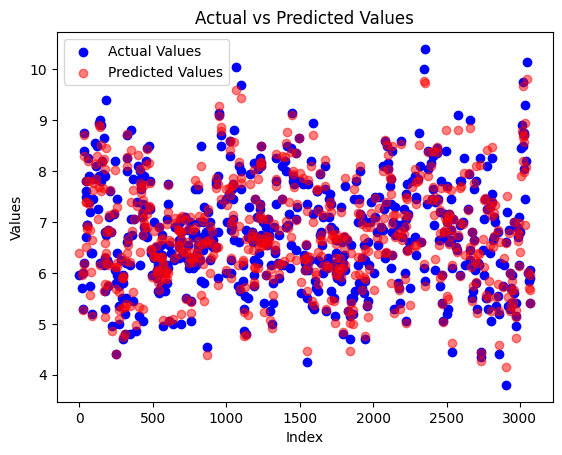

In [ ]:
# Scatter plot for actual values
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test.index, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

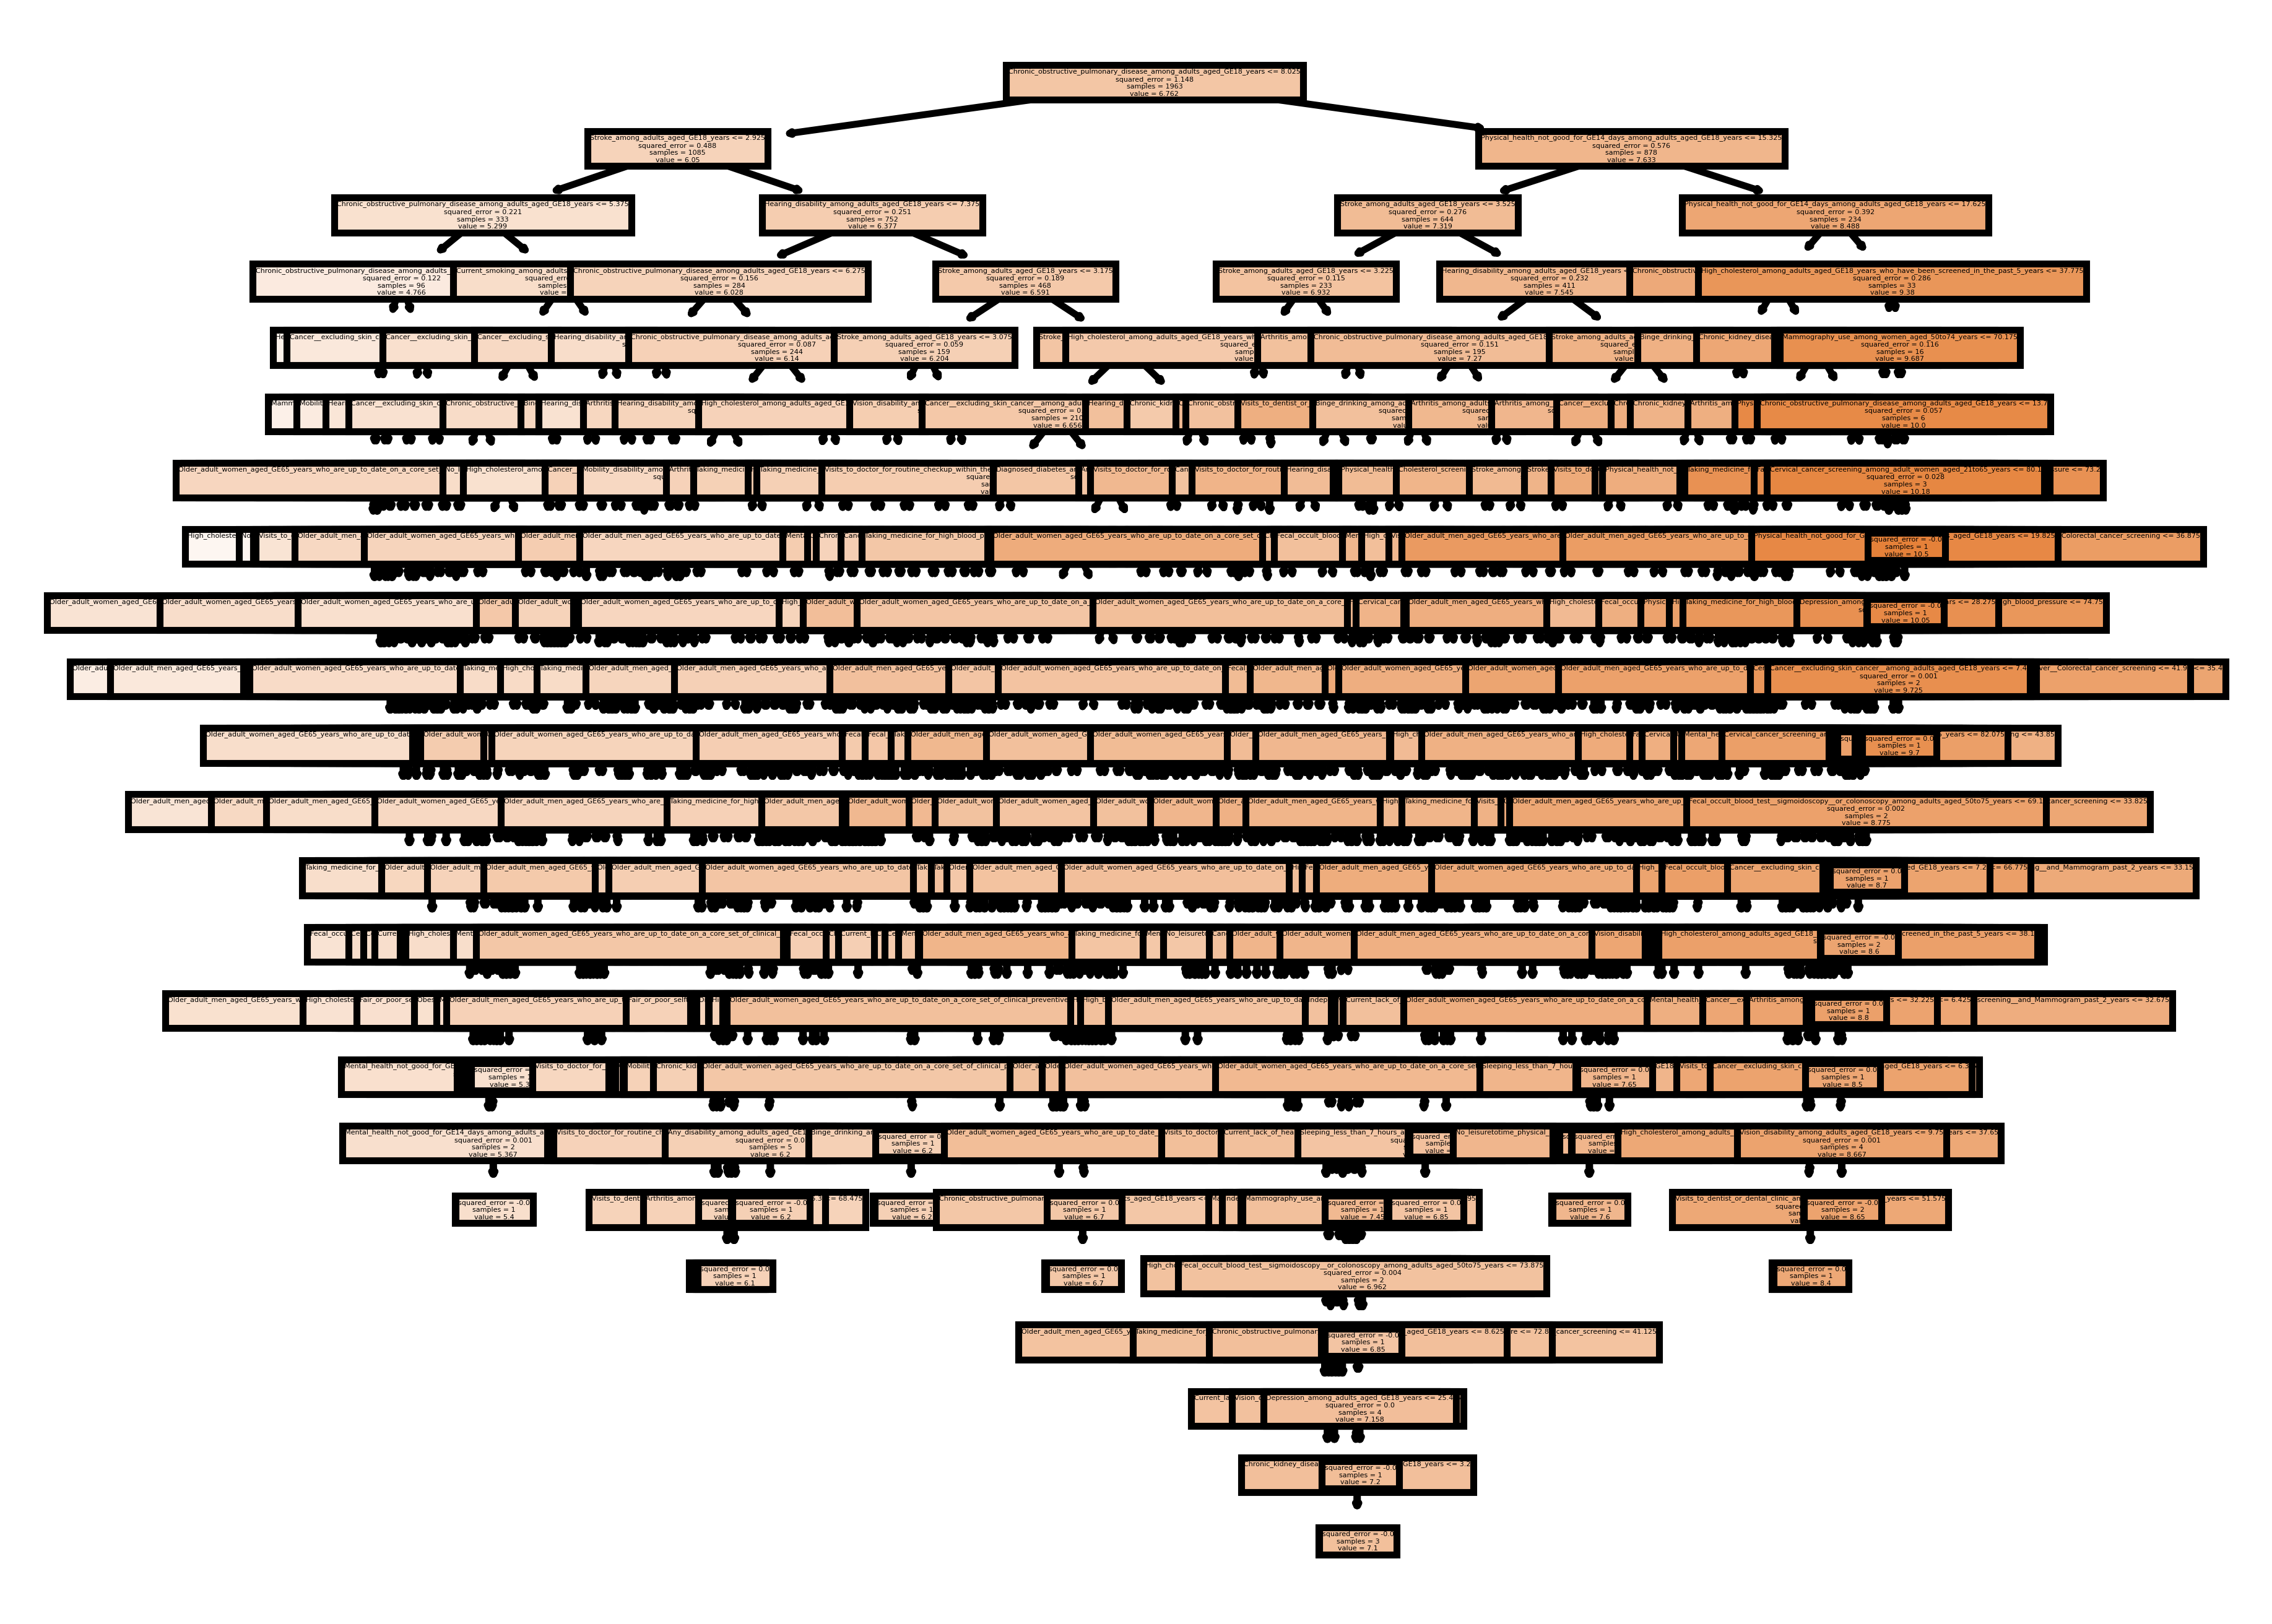

In [ ]:
from sklearn import tree


fn=cdc_regression_drop.columns
cn='Coronary_heart_disease_among_adults_aged_GE18_years'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# plot a single tree
estimator_rf = rf_regressor.estimators_[0]
tree.plot_tree(estimator_rf , feature_names = fn, filled = True);
fig.savefig('rf_individualtree.png')

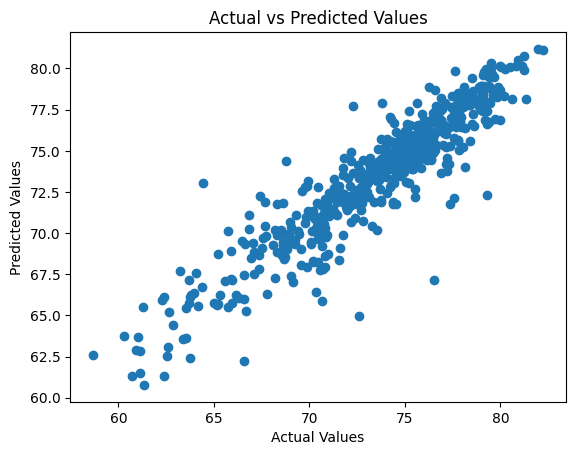

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

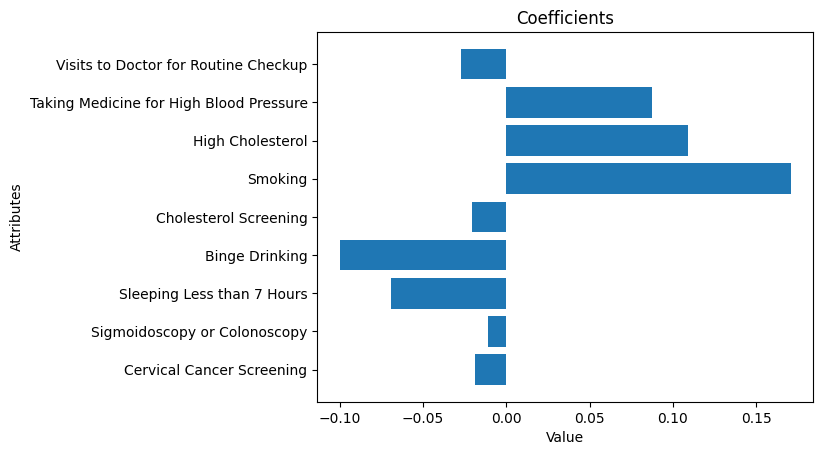

In [ ]:
bar_names = ["Cervical Cancer Screening", "Sigmoidoscopy or Colonoscopy", "Sleeping Less than 7 Hours", "Binge Drinking", "Cholesterol Screening", "Smoking", "High Cholesterol", "Taking Medicine for High Blood Pressure", "Visits to Doctor for Routine Checkup"]

plt.barh(bar_names,  coef)
 
# setting label of y-axis
plt.ylabel("Attributes")
 
# setting label of x-axis
plt.xlabel("Value") 
plt.title("Coefficients")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot with different colors
#plt.scatter(y_test, y_pred, c=np.abs(y_test - y_pred), cmap='viridis')
#plt.scatter(X_test['Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_blood_pressure'], y_test, c='red')
#plt.scatter(X_train['Taking_medicine_for_high_blood_pressure_control_among_adults_aged_GE18_years_with_high_blood_pressure'], y_pred, c='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.colorbar(label='Absolute Error')
plt.show()


drop_col_list_chd = ['All_teeth_lost_among_adults_aged_GE65_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening',
       'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years',
       'Any_disability_among_adults_aged_GE18_years',
       'Arthritis_among_adults_aged_GE18_years',
       'Cancer__excluding_skin_cancer__among_adults_aged_GE18_years',
       'Chronic_kidney_disease_among_adults_aged_GE18_years',
       'Chronic_obstructive_pulmonary_disease_among_adults_aged_GE18_years',
       'Cognitive_disability_among_adults_ages_GE18_years',
       'Current_asthma_among_adults_aged_GE18_years',
       'Current_lack_of_health_insurance_among_adults_aged_18to64_years',
       'Depression_among_adults_aged_GE18_years',
       'Diagnosed_diabetes_among_adults_aged_GE18_years',
       'Fair_or_poor_selftorated_health_status_among_adults_aged_GE18_years',
       'Hearing_disability_among_adults_aged_GE18_years',
       'Independent_living_disability_among_adults_aged_GE18_years',
       'Mental_health_not_good_for_GE14_days_among_adults_aged_GE18_years',
       'Mobility_disability_among_adults_aged_GE18_years',
       'Obesity_among_adults_aged_GE18_years',
       'Physical_health_not_good_for_GE14_days_among_adults_aged_GE18_years',
       'Selftocare_disability_among_adults_aged_GE18_years',
       'Stroke_among_adults_aged_GE18_years',
       'Vision_disability_among_adults_aged_GE18_years']

#'High_blood_pressure_among_adults_aged_GE18_years',
#'High_cholesterol_among_adults_aged_GE18_years_who_have_been_screened_in_the_past_5_years',
#